In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp
import os

#for dirname, _, filenames in os.walk('/kaggle/input'):
#    for filename in filenames:
#        print(os.path.join(dirname, filename))
        
df = pd.read_csv('/kaggle/input/advertising/Advertising.csv')
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


is there a relationship between marketing means and sales?

* In this part of this example we want to feature engineer only one x
* Lets derive total_spend as the sum of marketing channels
* Note this modifies the question to - does an increase in total spend influence sales


* Glancing at the data and fitting regression line
* lets take the feature engineered lonely x we made
* use np.polyfit to find the beta coefficients

 
Beta Coeffs derived by np.polyfit [0.04868788 4.24302822]
 


,TV,radio,newspaper,sales,total_spend
0,230.1,37.8,69.2,22.1,337.1
1,44.5,39.3,45.1,10.4,128.9
2,17.2,45.9,69.3,9.3,132.4
3,151.5,41.3,58.5,18.5,251.3
4,180.8,10.8,58.4,12.9,250.0


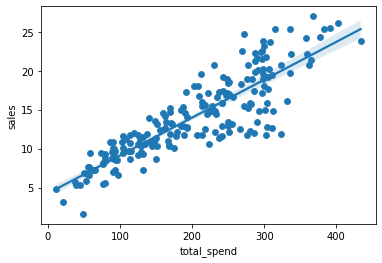

In [2]:
# single x example        

df = pd.read_csv('/kaggle/input/advertising/Advertising.csv') 

df['total_spend'] = df['TV'] + df['newspaper'] + df['radio']
X = df['total_spend']
y = df['sales']
  
print(' ')
print('Beta Coeffs derived by np.polyfit' , np.polyfit( X, y, deg = 1 ) )
print(' ')


sns.scatterplot( data = df , x = 'total_spend' , y = 'sales'); 
sns.regplot( data = df , x = 'total_spend' , y = 'sales'); 
df.head()

* We can create an equation from the above and plot it above our original data
* To analyze what expected predicted sales would be if we spend 200k
* Also we could fit higher order polynomial - would it be better?

13.98060422 Predicted Sales From spending 200



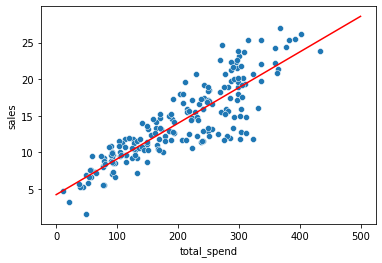

In [3]:
potential_spend = np.linspace(0 , 500 , 100 )
predicted_sales = 4.24302822 + 0.04868788*potential_spend

sns.scatterplot( data = df , x = 'total_spend' , y = 'sales'); 
plt.plot( potential_spend , predicted_sales, color = 'red'); 
 
###########################################################################################

spend = 200
predicted_sales = 4.24302822 + 0.04868788*spend

print( str(predicted_sales) + ' Predicted Sales', 'From spending ' + str(spend)    )
print('')



Betas of 3 degree polynomial in Decreasing Order:  [ 3.07615033e-07 -1.89392449e-04  8.20886302e-02  2.70495053e+00]



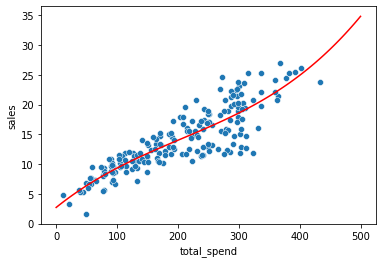

In [4]:
# returns X in order of devreasing power
# y = B3*x**3 + B2*x**2 + B1X + B0

print('Betas of 3 degree polynomial in Decreasing Order: ', np.polyfit(X , y, 3))
print()


pot_spend = np.linspace( 0 ,500 ,100)
pred_sales = 3.07615033e-07*pot_spend**3 + -1.89392449e-04*pot_spend**2 + 8.20886302e-02*pot_spend + 2.70495053e+00
sns.scatterplot( data = df , x = 'total_spend' , y = 'sales');
plt.plot( pot_spend , pred_sales , color = 'red');

* previously - checked if total_advertisting and sales
* Now , what is the relationship between each advertisting means instead

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


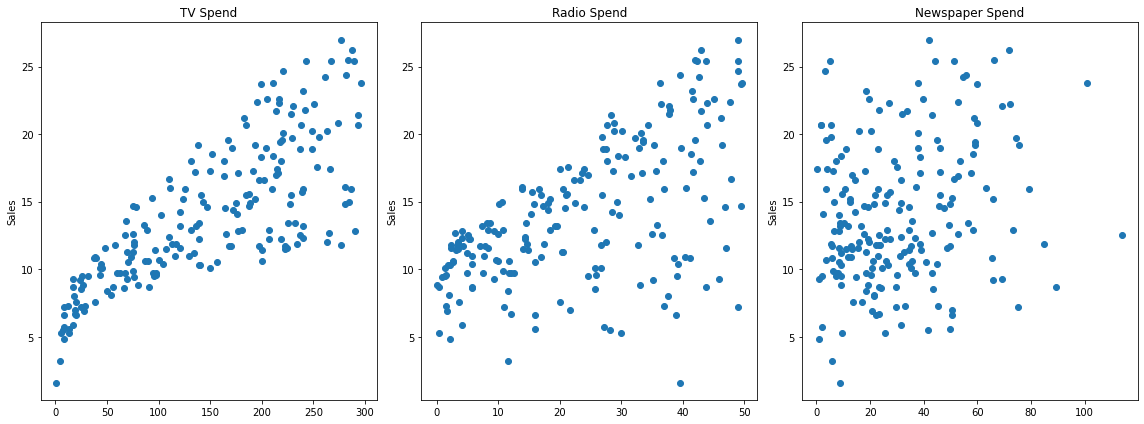

In [5]:
df = pd.read_csv('/kaggle/input/advertising/Advertising.csv')
 
    
f ,  a  = plt.subplots( nrows = 1 , ncols = 3 , figsize = ( 16 , 6 ))

a[0].plot( df['TV'], df['sales'], 'o')
a[0].set_ylabel("Sales")
a[0].set_title("TV Spend")

a[1].plot( df['radio'], df['sales'], 'o')
a[1].set_ylabel("Sales")
a[1].set_title("Radio Spend")

a[2].plot( df['newspaper'], df['sales'], 'o')
a[2].set_ylabel("Sales")
a[2].set_title("Newspaper Spend")

plt.tight_layout()

#sns.pairplot(df)

print('')
df.head()



* wanna compare test_pred erros to previous baselines set by historical models 
* if no model exist , compare Testing Error to Mean and Distribution of y

In [6]:
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error , mean_squared_error

X = df.drop('sales' , axis =1 )
y = df['sales'] 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
 
model = LinearRegression()
model.fit( X_train, y_train )

test_predictions = model.predict( X_test ) 
 
test_residuals = y_test - test_predictions

###################################################################################

# there are interpretations to each of these...
print('MAE  : ' , mean_absolute_error( y_test , test_predictions )        )
print('MSE  : ' , mean_squared_error( y_test , test_predictions  )        )
print('RMSE : ' , np.sqrt(mean_squared_error( y_test , test_predictions )))
print('')



MAE  :  1.4937750024728969
MSE  :  3.7279283306815105
RMSE :  1.9307843822347204



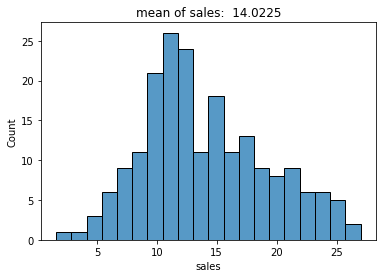

In [7]:
plt.title('mean of sales:  ' + str( df['sales'].mean()))
sns.histplot( data = df , x = 'sales' , bins = 20 ); 

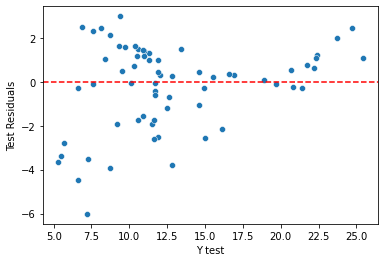

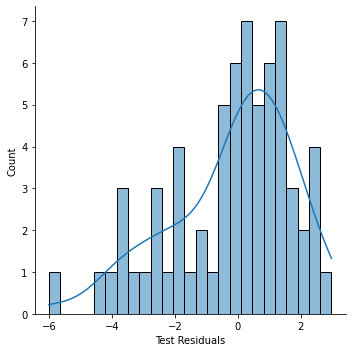

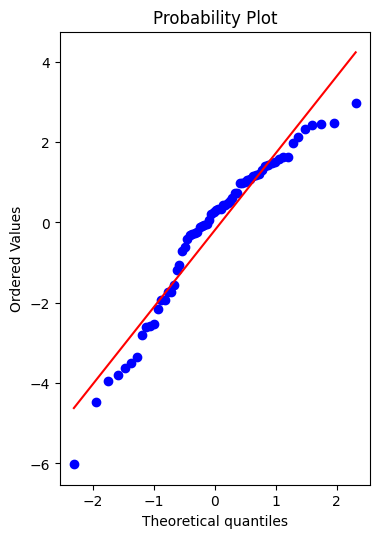

In [8]:
# Is the data set valid for linear regression
# look at residuals because they = y_test - test_predictions
# so its an exploration of how far we are
# making sure linear regression is appropriate can be verified with the residuals

sns.scatterplot(x = y_test , y = test_residuals);
plt.xlabel('Y test')
plt.ylabel('Test Residuals')
plt.axhline( y = 0 , color = 'r' , ls = '--');
plt.show()

print('')
sns.displot( test_residuals , bins = 25, kde = True)
plt.xlabel('Test Residuals')
plt.show()

f , a = plt.subplots( figsize = (4,6), dpi = 100 )
_ = sp.stats.probplot(test_residuals, plot = a)
plt.show()

[ 0.04576465  0.18853002 -0.00103749]



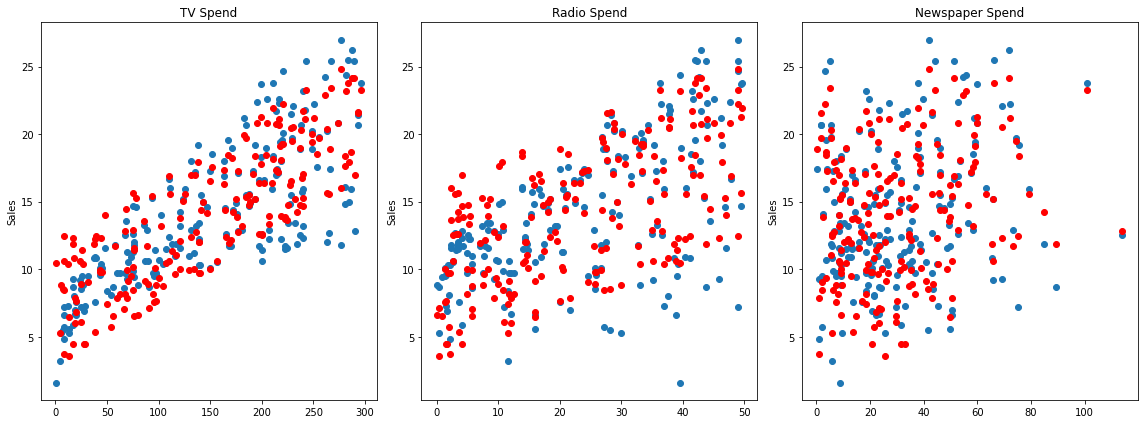

In [9]:
# Residual data adds up - we can retrain model on all X
# analyzing betas here

final_model =  LinearRegression()
final_model.fit( X, y )
y_hat = final_model.predict(X)
print(final_model.coef_)
print('')


f ,  a  = plt.subplots( nrows = 1 , ncols = 3 , figsize = ( 16 , 6 ))

a[0].plot( df['TV'], df['sales'], 'o')
a[0].plot( df['TV'], y_hat, 'o' , color  = 'red' )
a[0].set_ylabel("Sales")
a[0].set_title("TV Spend")

a[1].plot( df['radio'], df['sales'], 'o')
a[1].plot( df['radio'], y_hat , 'o', color  = 'red')
a[1].set_ylabel("Sales")
a[1].set_title("Radio Spend")

a[2].plot( df['newspaper'], df['sales'], 'o')
a[2].plot( df['newspaper'], y_hat, 'o', color  = 'red')
a[2].set_ylabel("Sales")
a[2].set_title("Newspaper Spend")

plt.tight_layout()

In [10]:
from joblib import dump , load

dump( final_model, 'final_sales_model.joblib')
 

['final_sales_model.joblib']

In [11]:
loaded_model = load('final_sales_model.joblib')
loaded_model.coef_

# 149 tv , 22 radio , 12 news paper
campaign =  [ [ 149, 22, 12 ] ]
loaded_model.predict(campaign)

/opt/conda/lib/python3.7/site-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


array([13.893032])



* Polynomial features
* The bias
* Values raised to a power
* Interactions
* Want to go from 𝑦̂ =𝛽0+𝛽1𝑥1+𝜖 to 𝑦̂ =𝛽0+𝛽1𝑥1+𝛽1𝑥21+...+𝛽𝑑𝑥𝑑1+𝜖

In [12]:
from sklearn.preprocessing import PolynomialFeatures

df = pd.read_csv('/kaggle/input/advertising/Advertising.csv')

X = df.drop('sales' ,axis = 1 )
y = df['sales'] 

polynomial_converter = PolynomialFeatures( degree = 2 , include_bias = False )
polynomial_converter.fit(X)
poly_features = polynomial_converter.transform(X)

# fit_transform 

print(poly_features.shape)
print(polynomial_converter.fit_transform(X))
print('')
print(poly_features)

(200, 9)
[[ 230.1    37.8    69.2  ... 1428.84 2615.76 4788.64]
 [  44.5    39.3    45.1  ... 1544.49 1772.43 2034.01]
 [  17.2    45.9    69.3  ... 2106.81 3180.87 4802.49]
 ...
 [ 177.      9.3     6.4  ...   86.49   59.52   40.96]
 [ 283.6    42.     66.2  ... 1764.   2780.4  4382.44]
 [ 232.1     8.6     8.7  ...   73.96   74.82   75.69]]

[[ 230.1    37.8    69.2  ... 1428.84 2615.76 4788.64]
 [  44.5    39.3    45.1  ... 1544.49 1772.43 2034.01]
 [  17.2    45.9    69.3  ... 2106.81 3180.87 4802.49]
 ...
 [ 177.      9.3     6.4  ...   86.49   59.52   40.96]
 [ 283.6    42.     66.2  ... 1764.   2780.4  4382.44]
 [ 232.1     8.6     8.7  ...   73.96   74.82   75.69]]


* How to choose optimal degree for a polynomial?
* Increasing model complexity in search for better performance leads to a Bias-Variance Trade off
* Overfitting leads to low error on training sets but high error on test/validation sets [cross validation and test train splits]
* Underfitting - High Bias!

    * Not so easy to see in high dimensional models
    * Plotting Train and Test set Error vs Model Complexity 
    * Ideally we want to increase complexity and error to go down



In [13]:
# create different order polynomial
# split poly feat train/test
# fit on train
# store/save the rmse for Both Train AND Test
# plot results ( error vs poly order)

train_rmse_errors  = []
test_rmse_errors = []

for d in range(1, 10):
    poly_converter = PolynomialFeatures( degree = d , include_bias = False)
    poly_features = poly_converter.fit_transform(X)
    
    X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.33, random_state=42)
    
    model = LinearRegression()
    model.fit( X_train, y_train )
    
    train_pred = model.predict(X_train )
    test_pred  = model.predict(X_test  )
    
    train_rmse = np.sqrt(mean_squared_error(y_train, train_pred ))
    test_rmse  = np.sqrt(mean_squared_error(y_test , test_pred  ))
    
    train_rmse_errors.append(train_rmse)
    test_rmse_errors.append(test_rmse)

* What Degree of polynomial do we want to include?
* think added complexity of adding 4 way interaction term - not warrented in this case
* context says 2 or 3 would be best

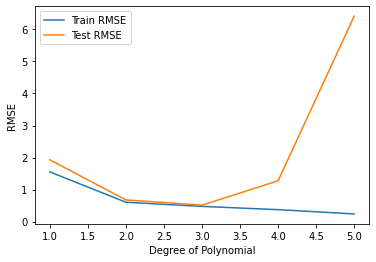

In [14]:
plt.plot( range(1,6), train_rmse_errors[:5], label = 'Train RMSE');
plt.plot( range(1,6), test_rmse_errors[:5], label = 'Test RMSE'); 
plt.xlabel('Degree of Polynomial')
plt.ylabel('RMSE')
plt.legend();

In [15]:
final_poly_converter = PolynomialFeatures( degree = 3 , include_bias = False)
final_model = LinearRegression()

full_converted_X = final_poly_converter.fit_transform(X)
final_model.fit(full_converted_X , y)

from joblib import dump, load

dump(final_model, 'final_poly_model.joblib')
dump(final_poly_converter , 'final_converter.joblib')

['final_converter.joblib']

In [16]:
loaded_converter = load('final_converter.joblib')
loaded_model = load('final_poly_model.joblib')

In [17]:
campaign = [[149, 22 , 12]]
transformed_data = loaded_converter.fit_transform(campaign)
loaded_model.predict(transformed_data)

array([14.64501014])

In [18]:

df = pd.read_csv('/kaggle/input/advertising/Advertising.csv')

X = df.drop('sales' ,axis = 1 )
y = df['sales'] 

from sklearn.preprocessing import PolynomialFeatures

polynomial_converter = PolynomialFeatures( degree = 3 , include_bias = False)
poly_features = polynomial_converter.fit_transform(X)
#poly_features.shape

##########################################################################################

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split( poly_features, y, test_size=0.33, random_state=42)

##########################################################################################

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test  = scaler.transform(X_test)

##########################################################################################

In [19]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error, mean_squared_error

#help(Ridge)
# eventaully we will use CV to find alpha - for now just use 10 
ridge_model = Ridge(alpha = 10)

ridge_model.fit(X_train, y_train)
test_predictions = ridge_model.predict(X_test)

MAE = mean_absolute_error(y_test , test_predictions)
RMSE = np.sqrt( mean_squared_error( y_test , test_predictions ) )

print(MAE)
print(RMSE)

0.6329556348463365
0.8927190051123457


In [20]:
from sklearn.linear_model import RidgeCV
#help(RidgeCV)

ridge_cv_model = RidgeCV(alphas=(0.1, 1.0, 10.0) , scoring = 'neg_mean_absolute_error')
ridge_cv_model.fit(X_train, y_train)

RidgeCV(alphas=array([ 0.1,  1. , 10. ]), scoring='neg_mean_absolute_error')

In [21]:
# which was the best performaning alpha ( based on which metrix ?)
ridge_cv_model.alpha_

#from sklearn.metrics import SCORERS
#SCORERS.keys()


0.1

In [22]:
MAE = mean_absolute_error(y_test, test_predictions) 
RMSE = np.sqrt( mean_squared_error( y_test , test_predictions ) )

print(MAE)
print(RMSE)

0.6329556348463365
0.8927190051123457


In [23]:
from sklearn.linear_model import LassoCV

# Lasso
# having to search either wide or for a long time
lasso_cv_model = LassoCV( eps= .1, n_alphas=100, cv = 5 )
# lasso_cv_model = LassoCV( eps= .001, n_alphas=100, cv = 5 , max_iter = 1000000)

lasso_cv_model.fit(X_train, y_train)

lasso_cv_model.alpha_

0.4968802520343365

In [24]:
test_predictions = lasso_cv_model.predict(X_test)
MAE = mean_absolute_error(y_test, test_predictions) 
RMSE = np.sqrt( mean_squared_error( y_test , test_predictions ) )

print(MAE)
print(RMSE)


0.6791873341672893
1.0399114953979072
